In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [ ]:
# Parse_dates - аргумент, который указывает на то, что в переданном столбце стоит именно дата (datetime64[ns]), 
# а не просто object. Так, например 01.02.2021 преобразуется в 2021-01-02 (формат “гггг-дд-мм”)
# Если нам нужен формат “гггг-мм-дд”, то дополнительно указываем аргумент dayfirst=True
# df = pd.read_csv('тест.csv' ,parse_dates=['date'], dayfirst=True)

https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/09_timeseries.html?highlight=datetime

In [2]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [4]:
df.head(10)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12
5,2008-01-06,-14
6,2008-01-07,-6
7,2008-01-08,-7
8,2008-01-09,-6
9,2008-01-10,0


In [11]:
df['Day'].min()

Timestamp('2008-01-01 00:00:00')

С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [46]:
df.groupby(df['Day'].dt.year)['t'].mean()

Day
2008    8.545205
2009    7.610959
2010    7.117808
2011    8.337912
2012    6.980822
2013    8.728767
2014    8.931507
2015    9.079452
2016    7.907104
Name: t, dtype: float64

In [39]:
# Самый холодный год по средней температуре
df.groupby(df['Day'].dt.year)['t'].mean().idxmin()

2012

In [43]:
# Самый теплый год по средней температуре
df.groupby(df['Day'].dt.year)['t'].mean().idxmax()

2015

**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [72]:
junes = df[df['Day'].dt.month == 1].copy()
posit_junes = junes[junes['t'] >= 0]
count = posit_junes.groupby(df['Day'].dt.year)['t'].count()
count

Day
2008    19
2009    11
2011     5
2012     6
2013     5
2014     8
2015    14
2016     5
Name: t, dtype: int64

In [74]:
# Наибольшее число дней с положительной температурой в январе
count.idxmax()

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [92]:
# как красиво брать конкретный сезон?
june = df[df['Day'].dt.month == 6]
july = df[df['Day'].dt.month == 7]
aug = df[df['Day'].dt.month == 8]
summer = pd.concat([june, july, aug], ignore_index=True)

# получил датафрейм с летними месяцами
summer['Day'].dt.month.unique()

array([6, 7, 8])

In [96]:
summer.groupby(summer['Day'].dt.year)['t'].mean()

Day
2008    18.119565
2009    18.728261
2010    22.119565
2011    21.318681
2012    19.086957
2013    21.543478
2014    20.706522
2015    19.032609
2016    19.326087
Name: t, dtype: float64

In [98]:
# год с самым холодным летом
summer.groupby(summer['Day'].dt.year)['t'].mean().idxmin()

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [151]:
# добавим столбец с температурами "предыдущих" дней. То есть просто столбец "t" со сдвигом
prev_df = df.copy()

# Для самой первой температуры ставим ту же, чтобы скачок был ноль. Это делается потому, что из самой первой 
# Температуры нам ничего не надо вычитать. 
series_prev_days = pd.concat([pd.Series(prev_df['t'][0]), prev_df['t']])

# Обрезаем последний элемент для равенства длин столбцов,ну и потому что дальше последнего дня мы ничего не вычитаем
prev_t = series_prev_days.iloc[:-1]

prev_df['prev_t'] = prev_t.values
prev_df

,Day,t,prev_t
0,2008-01-01,0,0
1,2008-01-02,-5,0
2,2008-01-03,-11,-5
3,2008-01-04,-11,-11
4,2008-01-05,-12,-11
...,...,...,...
3280,2016-12-27,1,5
3281,2016-12-28,-3,1
3282,2016-12-29,0,-3
3283,2016-12-30,3,0


In [152]:
def diff_t(t, prev_t):
    return abs(t - prev_t)

prev_df['difference'] = prev_df.apply(lambda x: diff_t(x['t'], x['prev_t']), axis=1)
prev_df

,Day,t,prev_t,difference
0,2008-01-01,0,0,0
1,2008-01-02,-5,0,5
2,2008-01-03,-11,-5,6
3,2008-01-04,-11,-11,0
4,2008-01-05,-12,-11,1
...,...,...,...,...
3280,2016-12-27,1,5,4
3281,2016-12-28,-3,1,4
3282,2016-12-29,0,-3,3
3283,2016-12-30,3,0,3


In [173]:
# День с наибольшим перепадом 
prev_df.iloc[prev_df['difference'].idxmax()]

Day           2014-05-27 00:00:00
t                               7
prev_t                         22
difference                     15
Name: 2335, dtype: object

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

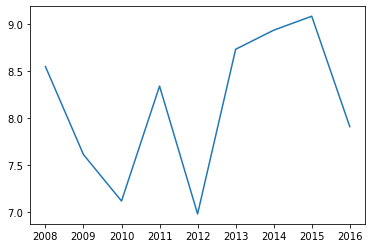

In [182]:
data = df.groupby(df['Day'].dt.year)['t'].mean()
x = data.index
y = data.values
plt.plot(x,y)